# Setup

In [12]:
import pandas as pd
from scipy import stats

In [13]:
import seaborn as sns

In [14]:
import numpy as np

# Laod Data

In [15]:
filename = './output02.csv'
df = pd.read_csv(filename, header=0, index_col=0)
df.head()

,IOS_score,IOS_group,wc_self,wc_target,wc_intercept,Overlap_score,word_vec_avg_self,word_vec_avg_target,_merge,euclidean_distance,manhattan_distance,cosine_similarity
MID,,,,,,,,,,,,
3,2,LowIOS,14,10,1,0.043478,[ 0.1058292 0.02908306 0.05915746 0.029480...,[ 0.10281058 -0.01622817 0.12231994 0.001097...,both,0.392200,2.212569,0.759
11,2,LowIOS,4,15,1,0.055556,[ 1.69084147e-02 -7.26589700e-03 2.11768001e-...,[ 0.06061446 0.01933753 0.0653864 0.011108...,both,0.494849,2.866378,0.720
13,6,HighIOS,7,6,0,0.000000,[ 0.05254399 -0.02020597 0.08731089 0.000369...,[ 1.57473356e-01 -2.42090737e-03 7.84671158e-...,both,0.448354,2.635906,0.711
17,3,LowIOS,15,12,3,0.125000,[ 0.04897259 0.03272291 0.11012402 -0.000982...,[ 0.10208222 0.0109177 0.06720565 0.062141...,both,0.258167,1.495546,0.879
22,6,HighIOS,4,15,4,0.266667,[ 0.03574508 0.05513598 0.23960969 0.043273...,[ 7.4052483e-02 3.6018115e-02 1.9052523e-01 ...,both,0.411166,2.190575,0.792


In [16]:
df = df.dropna()
df.head()

,IOS_score,IOS_group,wc_self,wc_target,wc_intercept,Overlap_score,word_vec_avg_self,word_vec_avg_target,_merge,euclidean_distance,manhattan_distance,cosine_similarity
MID,,,,,,,,,,,,
3,2,LowIOS,14,10,1,0.043478,[ 0.1058292 0.02908306 0.05915746 0.029480...,[ 0.10281058 -0.01622817 0.12231994 0.001097...,both,0.392200,2.212569,0.759
11,2,LowIOS,4,15,1,0.055556,[ 1.69084147e-02 -7.26589700e-03 2.11768001e-...,[ 0.06061446 0.01933753 0.0653864 0.011108...,both,0.494849,2.866378,0.720
13,6,HighIOS,7,6,0,0.000000,[ 0.05254399 -0.02020597 0.08731089 0.000369...,[ 1.57473356e-01 -2.42090737e-03 7.84671158e-...,both,0.448354,2.635906,0.711
17,3,LowIOS,15,12,3,0.125000,[ 0.04897259 0.03272291 0.11012402 -0.000982...,[ 0.10208222 0.0109177 0.06720565 0.062141...,both,0.258167,1.495546,0.879
22,6,HighIOS,4,15,4,0.266667,[ 0.03574508 0.05513598 0.23960969 0.043273...,[ 7.4052483e-02 3.6018115e-02 1.9052523e-01 ...,both,0.411166,2.190575,0.792


# Descriptive Statistics on Overlap Score

In [17]:
# Low IOS Group
df.loc[df['IOS_group'] == 'LowIOS', ['Overlap_score']].describe().T

,count,mean,std,min,25%,50%,75%,max
Overlap_score,30.0,0.091445,0.083015,0.0,0.04372,0.073413,0.140476,0.375


In [18]:
# High IOS Group
df.loc[df['IOS_group'] == 'HighIOS', ['Overlap_score']].describe().T

,count,mean,std,min,25%,50%,75%,max
Overlap_score,23.0,0.082933,0.090257,0.0,0.0,0.064516,0.126667,0.285714


# Visualization

## Overlapping Score

### Overlapping Score: Histogram

array([<Axes: title={'center': 'HighIOS'}>,
       <Axes: title={'center': 'LowIOS'}>], dtype=object)

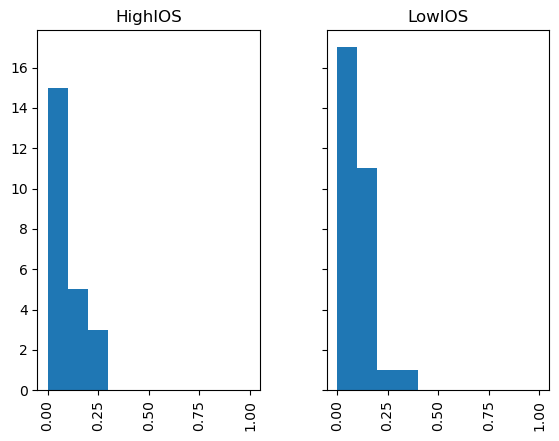

In [19]:
df['Overlap_score'].hist(by=df['IOS_group'], range=[0, 1], sharey=True)

### Overlapping Score: Boxplot

<Axes: title={'center': 'Overlap_score'}, xlabel='[IOS_group]'>

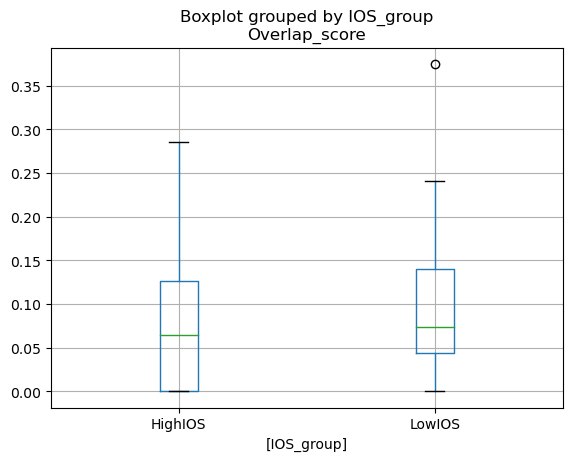

In [20]:
df.boxplot(column=['Overlap_score'], by=['IOS_group'])

### Overlapping Score: Scatter plot

<Axes: xlabel='Overlap_score', ylabel='IOS_score'>

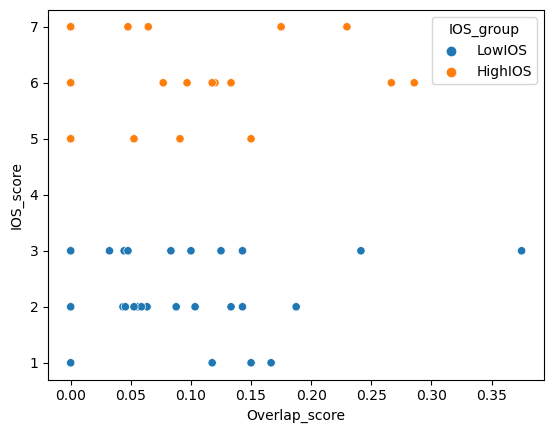

In [21]:
sns.scatterplot(x='Overlap_score', y='IOS_score', hue='IOS_group', data=df)

## Euclidean Distance

### Euclidean Distance: Histogram

array([<Axes: title={'center': 'HighIOS'}>,
       <Axes: title={'center': 'LowIOS'}>], dtype=object)

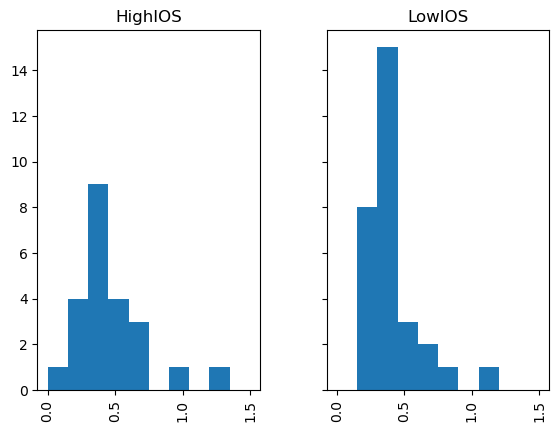

In [22]:
df['euclidean_distance'].hist(by=df['IOS_group'], range=[0, 1.5], sharey=True)

### Euclidean Distance: Boxplot

<Axes: title={'center': 'euclidean_distance'}, xlabel='[IOS_group]'>

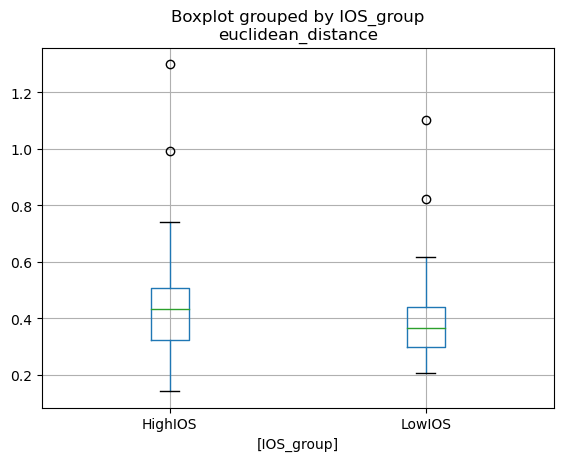

In [23]:
df.boxplot(column=['euclidean_distance'], by=['IOS_group'])

### Euclidean Distance: Scatter plot

<Axes: xlabel='euclidean_distance', ylabel='IOS_score'>

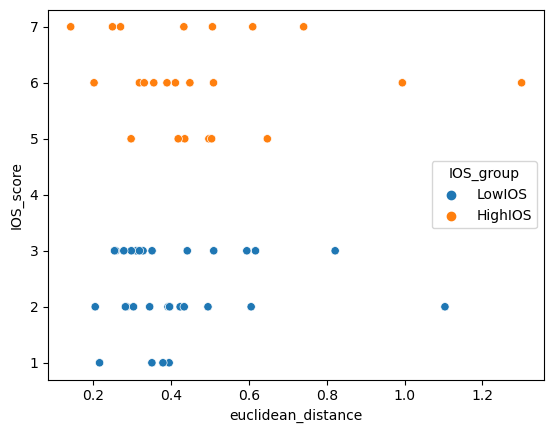

In [24]:
sns.scatterplot(x='euclidean_distance', y='IOS_score', hue='IOS_group', data=df)

## Manhattan Distance

### Manhattan Distance: Histogram

array([<Axes: title={'center': 'HighIOS'}>,
       <Axes: title={'center': 'LowIOS'}>], dtype=object)

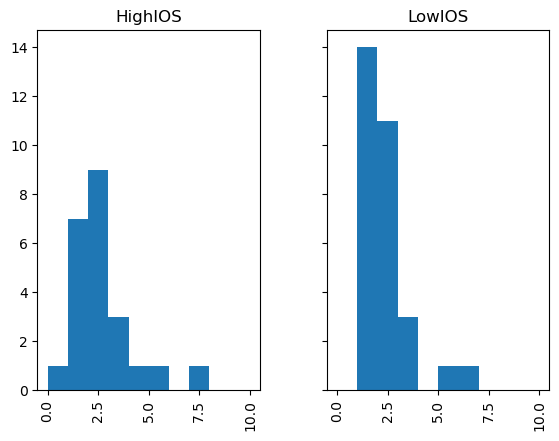

In [25]:
df['manhattan_distance'].hist(by=df['IOS_group'], range=[0, 10], sharey=True)

### Manhattan Distance: Boxplot

<Axes: title={'center': 'manhattan_distance'}, xlabel='[IOS_group]'>

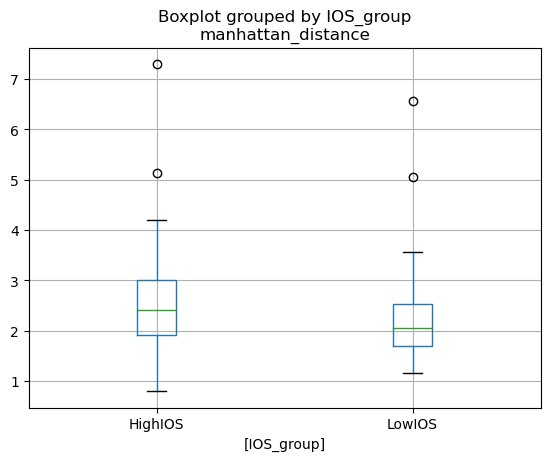

In [26]:
df.boxplot(column=['manhattan_distance'], by=['IOS_group'])

### Manhattan Distance: Scatter plot

<Axes: xlabel='manhattan_distance', ylabel='IOS_score'>

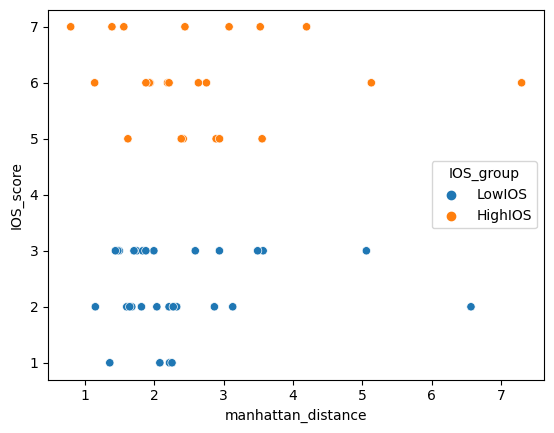

In [27]:
sns.scatterplot(x='manhattan_distance', y='IOS_score', hue='IOS_group', data=df)

## Cosine Similarity

### Cosine Similarity: Histogram

array([<Axes: title={'center': 'HighIOS'}>,
       <Axes: title={'center': 'LowIOS'}>], dtype=object)

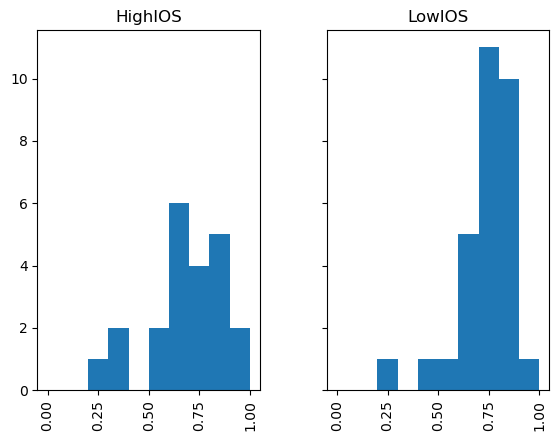

In [28]:
df['cosine_similarity'].hist(by=df['IOS_group'], range=[0, 1], sharey=True)

### Cosine Similarity: Boxplot

<Axes: title={'center': 'cosine_similarity'}, xlabel='[IOS_group]'>

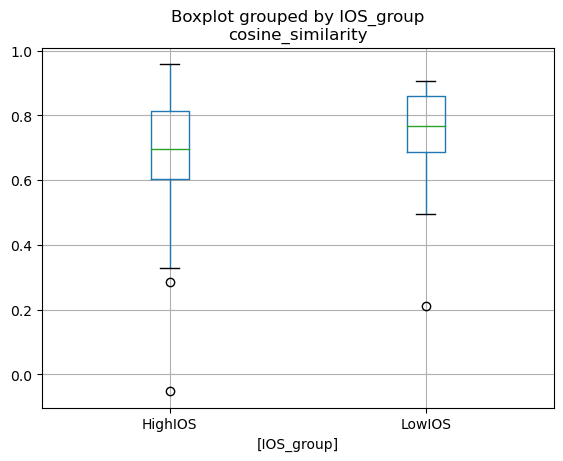

In [29]:
df.boxplot(column=['cosine_similarity'], by=['IOS_group'])

### Cosine Similarity: Scatter plot

<Axes: xlabel='cosine_similarity', ylabel='IOS_score'>

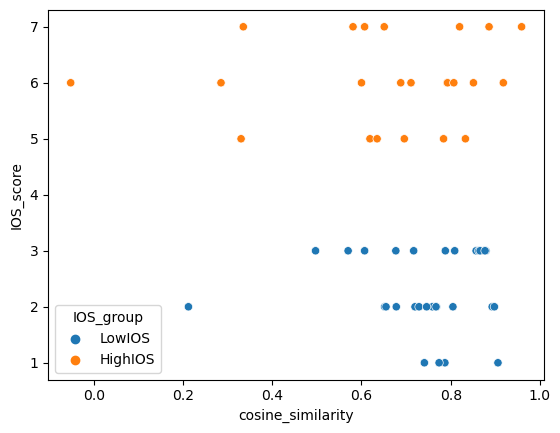

In [30]:
sns.scatterplot(x='cosine_similarity', y='IOS_score', hue='IOS_group', data=df)

# Check the Outliers

In [31]:
df.loc[df['Overlap_score'] == 1, :]

,IOS_score,IOS_group,wc_self,wc_target,wc_intercept,Overlap_score,word_vec_avg_self,word_vec_avg_target,_merge,euclidean_distance,manhattan_distance,cosine_similarity
MID,,,,,,,,,,,,


# Confirmatory Analyses

## 01: a one-tailed independent two-sample t-test
The author had planned:
- sample size: 51 for each group
- alpha: 0.05
- effect size: 0.5
- power: 0.8

In [32]:
groupH = df[df['IOS_group']=='HighIOS']
groupL = df[df['IOS_group']=='LowIOS']

In [33]:
len(groupH)

23

In [34]:
len(groupL)

30

### Overlapping Magnitude

In [35]:
stats.ttest_ind(groupH['Overlap_score'], groupL['Overlap_score'], equal_var=False, alternative='greater') # perform Welch's t-test without assuming equal population variance.

TtestResult(statistic=-0.35225744329938674, pvalue=0.6368610940294006, df=45.327116461716955)

In [36]:
stats.ttest_ind(groupH['Overlap_score'], groupL['Overlap_score'], equal_var=False, alternative='less') # perform Welch's t-test without assuming equal population variance.

TtestResult(statistic=-0.35225744329938674, pvalue=0.3631389059705993, df=45.327116461716955)

### Euclidean Distance

In [37]:
stats.ttest_ind(groupH['euclidean_distance'], groupL['euclidean_distance'], equal_var=False, alternative='less')

TtestResult(statistic=1.030813163335521, pvalue=0.8454849577213293, df=38.68671262009021)

In [38]:
stats.ttest_ind(groupH['euclidean_distance'], groupL['euclidean_distance'], equal_var=False, alternative='greater')

TtestResult(statistic=1.030813163335521, pvalue=0.1545150422786708, df=38.68671262009021)

### Manhattan Distance

In [39]:
stats.ttest_ind(groupH['manhattan_distance'], groupL['manhattan_distance'], equal_var=False, alternative='less')

TtestResult(statistic=0.9298762907071048, pvalue=0.8210937879006798, df=41.503060157355065)

In [40]:
stats.ttest_ind(groupH['manhattan_distance'], groupL['manhattan_distance'], equal_var=False, alternative='greater')

TtestResult(statistic=0.9298762907071048, pvalue=0.17890621209932023, df=41.503060157355065)

### Cosine Similarity

In [41]:
stats.ttest_ind(groupH['cosine_similarity'], groupL['cosine_similarity'], equal_var=False, alternative='greater')

TtestResult(statistic=-1.562960008592142, pvalue=0.9363354458236332, df=33.97770631481316)

In [42]:
stats.ttest_ind(groupH['cosine_similarity'], groupL['cosine_similarity'], equal_var=False, alternative='less')

TtestResult(statistic=-1.562960008592142, pvalue=0.06366455417636684, df=33.97770631481316)

### Post hoc Power Analysis

In [43]:
print('Num. of group H: ' + str(len(groupH)))
print('Num. of group L: ' + str(len(groupL)))

Num. of group H: 23
Num. of group L: 30


In [44]:
def cohens_d(x1, x2):
    n1 = len(x1)
    n2 = len(x2)
    x1_mean = x1.mean()
    x2_mean = x2.mean()
    s1 = x1.std()
    s2 = x2.std()
    s = np.sqrt((n1*np.square(s1) + n2*np.square(s2)) / (n1 + n2))
    d = np.abs(x1_mean - x2_mean) / s
    return d

In [45]:
euclidean_d = cohens_d(groupH['euclidean_distance'], groupL['euclidean_distance'])
print('Cohen''s d (Euclidean distance): {:.4f}'.format(euclidean_d))
manhattan_d = cohens_d(groupH['manhattan_distance'], groupL['manhattan_distance'])
print('Cohen''s d (Manhattan distance): {:.4f}'.format(manhattan_d))
cosine_d = cohens_d(groupH['cosine_similarity'], groupL['cosine_similarity'])
print('Cohen''s d (Cosine similarity): {:.4f}'.format(cosine_d))

Cohens d (Euclidean distance): 0.2975
Cohens d (Manhattan distance): 0.2651
Cohens d (Cosine similarity): 0.4607


In [46]:
# Compute post hoc power powered by G*Power
print('Post hoc power (Euclidean distance): {:.4f}'.format(0.2791))
print('Post hoc power (Manhattan distance): {:.4f}'.format(0.2417))
print('Post hoc power (Cosine similarity): {:.4f}'.format(0.4981))

Post hoc power (Euclidean distance): 0.2791
Post hoc power (Manhattan distance): 0.2417
Post hoc power (Cosine similarity): 0.4981


## 02: Spearman's rank correlation coefficient between the IOS scores and the overlapping scores
The author had planned:
- sample size: 119, including participants who rated on the IOS scale as 4
- alpha: 0.05
- effect size: 0.3
- power: 0.93
- two-tailed


### Overlapping score

In [47]:
df.head(1)

,IOS_score,IOS_group,wc_self,wc_target,wc_intercept,Overlap_score,word_vec_avg_self,word_vec_avg_target,_merge,euclidean_distance,manhattan_distance,cosine_similarity
MID,,,,,,,,,,,,
3,2,LowIOS,14,10,1,0.043478,[ 0.1058292 0.02908306 0.05915746 0.029480...,[ 0.10281058 -0.01622817 0.12231994 0.001097...,both,0.3922,2.212569,0.759


In [48]:
iosscores = df['IOS_score']
overlapscores = df['Overlap_score']

In [49]:
res = stats.spearmanr(iosscores, overlapscores)
res

SignificanceResult(statistic=-0.07380869485840447, pvalue=0.5994164727626772)

### Euclidean Dsitance

In [50]:
euclidean_distance = df['euclidean_distance']
res = stats.spearmanr(iosscores, euclidean_distance)
res

SignificanceResult(statistic=0.12735620059322034, pvalue=0.3634733011288892)

### Manhattan Distance

In [51]:
manhattan_distance = df['manhattan_distance']
res = stats.spearmanr(iosscores, manhattan_distance)
res

SignificanceResult(statistic=0.12826147891730783, pvalue=0.36004456440949073)

### Cosine Similarity

In [52]:
cosine_similarity = df['cosine_similarity']
res = stats.spearmanr(iosscores, cosine_similarity)
res

SignificanceResult(statistic=-0.12789371589722792, pvalue=0.3614350813660161)

### Post hoc Power Analysis

In [53]:
print('Num. of Sumple of the IOS socre: ' + str(len(iosscores)))
print('Num. of Sumple of the Overlapping socre: ' + str(len(overlapscores)))

Num. of Sumple of the IOS socre: 53
Num. of Sumple of the Overlapping socre: 53


Achieved power: 0.23 (H1: rho1 = 0.127)